            Timestamp  WD TZS    WD Smear
0 2024-02-01 00:00:00   219.0  240.135950
1 2024-02-01 01:00:00   219.0  239.017605
2 2024-02-01 02:00:00   223.5  237.858197
3 2024-02-01 03:00:00   224.5  238.313225
4 2024-02-01 04:00:00   220.0  237.401237


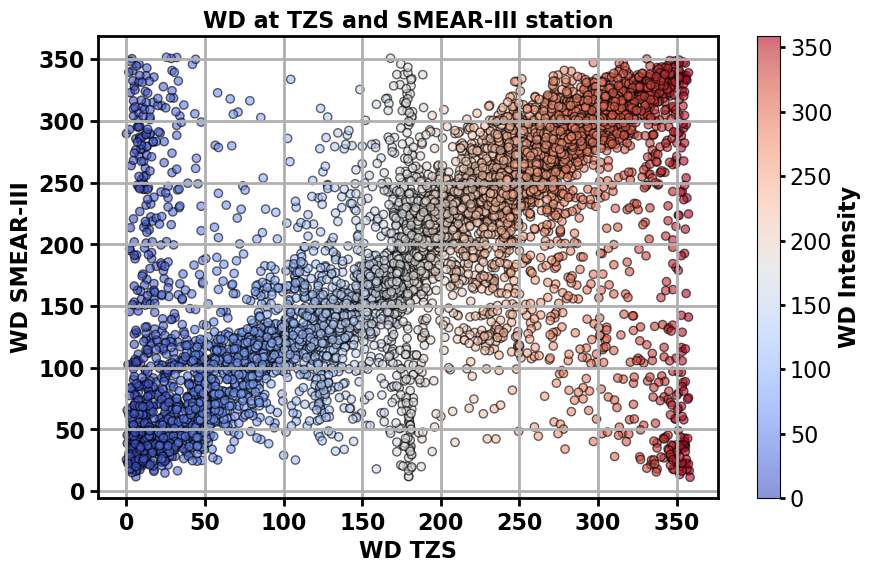

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file path
file_path = '/Users/touqeergill/Desktop/Windrose (TZS and Smear).xlsx'

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load data from the first sheet
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])

# Display first few rows to verify data
print(df.head())

# Extract relevant columns for plotting
x = df['WD TZS']
y = df['WD Smear']

# Create scatter plot with color intensity
plt.figure(figsize=(10, 6))
sc = plt.scatter(x, y, c=x, cmap="coolwarm", alpha=0.6, edgecolors='k')

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label("WD Intensity", fontsize=16, fontweight='bold')
cbar.ax.yaxis.set_tick_params(labelsize=16, width=2, direction="out")

# Labels and title
plt.xlabel("WD TZS", fontsize=16, fontweight='bold')
plt.ylabel("WD SMEAR-III", fontsize=16, fontweight='bold')
plt.title("WD at TZS and SMEAR-III station", fontsize=16, fontweight='bold')

# Bold tick values and move them outside
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.tick_params(axis="both", direction="out", length=6, width=2)

# Add grid and thicker outline
plt.grid(True, linewidth=2)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Show the plot
plt.show()

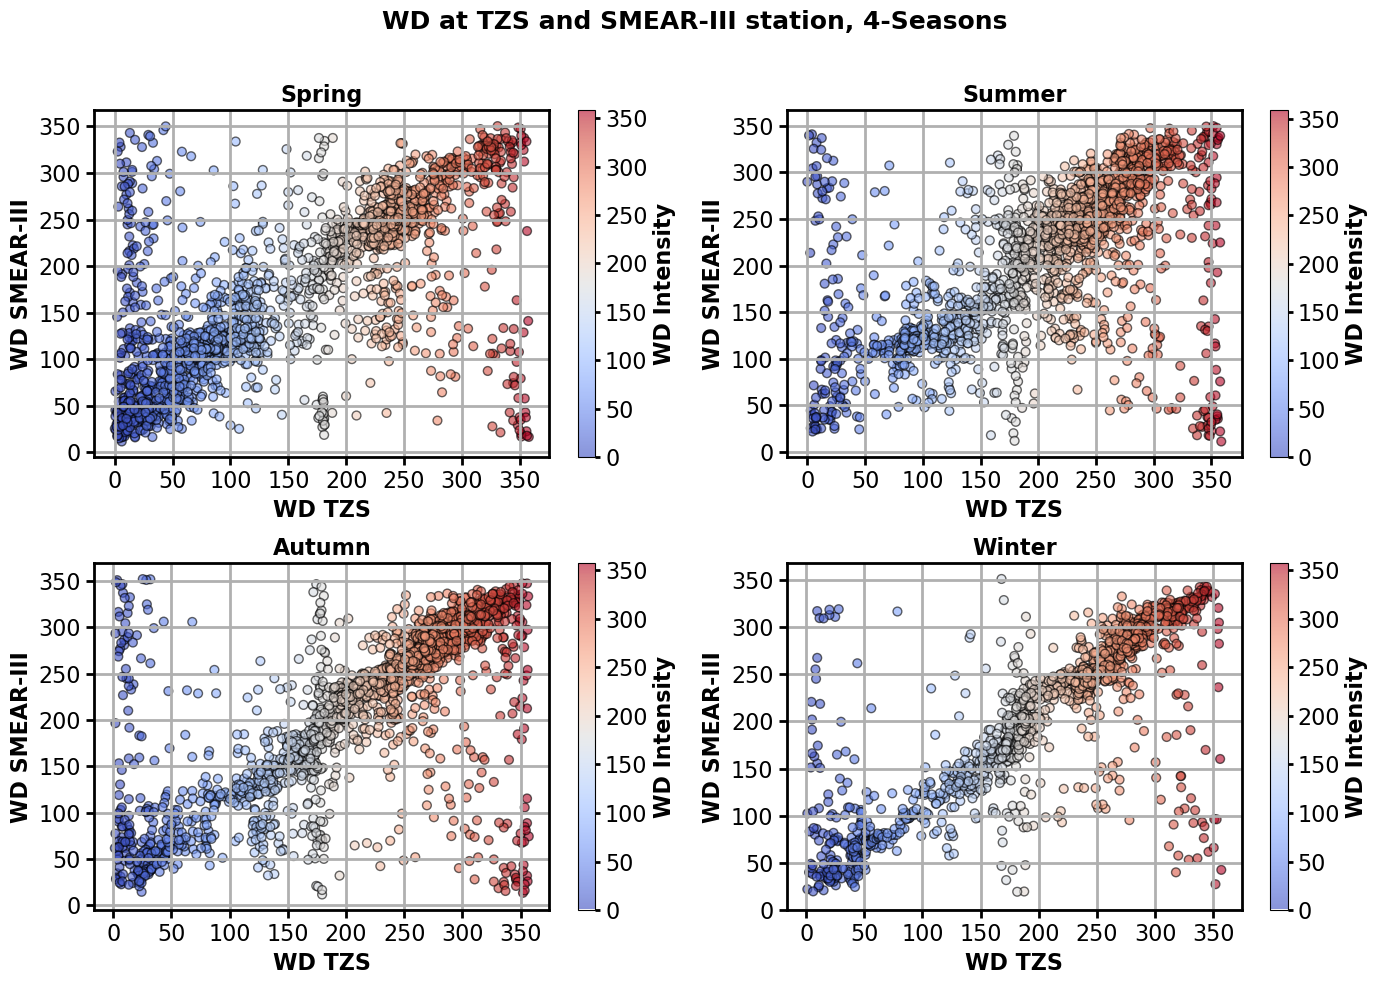

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file path (Update this path if running locally)
file_path = '/Users/touqeergill/Desktop/Windrose (TZS and Smear).xlsx'

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load data from the first sheet
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])

# Convert the Timestamp column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the month from the timestamp
df['Month'] = df['Timestamp'].dt.month

# Define seasons based on Finland's classification
seasons = {
    "Spring": [3, 4, 5],
    "Summer": [6, 7, 8],
    "Autumn": [9, 10, 11],
    "Winter": [12, 1, 2]
}

# Create separate DataFrames for each season
seasonal_data = {season: df[df['Month'].isin(months)] for season, months in seasons.items()}

# Define tick range (0, 50, 100, ..., max value)
xticks_range = list(range(0, int(df['WD TZS'].max()) + 1, 50))
yticks_range = list(range(0, int(df['WD Smear'].max()) + 1, 50))

# Create a figure with subplots for the four seasons
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("WD at TZS and SMEAR-III station, 4-Seasons", fontsize=18, fontweight='bold')

# Define subplot positions
season_positions = {
    "Spring": (0, 0),
    "Summer": (0, 1),
    "Autumn": (1, 0),
    "Winter": (1, 1)
}

# Plot each season's data with circular markers
for season, data in seasonal_data.items():
    row, col = season_positions[season]
    ax = axes[row, col]

    # Scatter plot with circular markers
    sc = ax.scatter(data['WD TZS'], data['WD Smear'], c=data['WD TZS'], cmap="coolwarm", 
                    alpha=0.6, edgecolors='black', s=40, marker='o')

    # Add color bar
    cbar = fig.colorbar(sc, ax=ax)
    cbar.set_label("WD Intensity", fontsize=16, fontweight='bold')
    cbar.ax.yaxis.set_tick_params(labelsize=16, width=2, direction="out")
    cbar.set_ticks(xticks_range)  # Set tick range for color bar

    # Labels and title
    ax.set_xlabel("WD TZS", fontsize=16, fontweight='bold')
    ax.set_ylabel("WD SMEAR-III", fontsize=16, fontweight='bold')
    ax.set_title(f"{season}", fontsize=16, fontweight='bold')

    # Bold tick values, set range from 0 to max value with steps of 50
    ax.set_xticks(xticks_range)
    ax.set_yticks(yticks_range)
    ax.tick_params(axis="both", direction="out", length=6, width=2, labelsize=16)

    # Add grid and thicker outline
    ax.grid(True, linewidth=2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()